<a href="https://colab.research.google.com/github/Yara-Cordero/M256_YaCor/blob/main/Day%201/02_pandasintro.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Pandas

<a target="_blank" href="https://colab.research.google.com/github/LuWidme/uk259/blob/main/demos/Pandas%20Intro.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>


Pandas is a Data Manipulaiton Library hat makes it easy to handle complex datasets.

Creating a DataFrame by passing a NumPy array, with labeled columns:

In [84]:
import pandas as pd
import numpy as np
#df=pd.read_csv("../datasets/melb_data.csv")
#df[df.isnull().any(axis=1)].iloc[-5:,14:17]

df = pd.DataFrame(np.random.randn(6, 4),  columns=list("ABCD"))

The columns of the resulting DataFrame have different dtypes.

If you’re using IPython, tab completion for column names (as well as public attributes) is automatically enabled. Here’s a subset of the attributes that will be completed:



In [85]:
df.dtypes

,0
A,float64
B,float64
C,float64
D,float64


## Viewing data
df.head()
df.tail(3)
df.describe()
df.sort_values(by="B")
df.sort_index(axis=1, ascending=False)

## Selecting Data

In [86]:
print(df["A"])

print(df.iloc[3:5, 0:2] )#selection by index

0   -0.595112
1    0.119286
2   -0.566098
3   -0.077073
4   -0.317541
5   -0.512135
Name: A, dtype: float64
          A         B
3 -0.077073 -0.934885
4 -0.317541  0.248262


## Boolean indexing

In [87]:
print(df[df > 0])


          A         B         C         D
0       NaN       NaN  0.224057       NaN
1  0.119286  1.573612       NaN  0.045233
2       NaN       NaN       NaN       NaN
3       NaN       NaN       NaN  0.132914
4       NaN  0.248262       NaN  0.045840
5       NaN       NaN  0.742516  0.274025


In [88]:
df.iloc[1,1] = "Hello"

df[df.isin(["Hello", "World"])]

<ipython-input-88-808061c0b145>:1: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'Hello' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df.iloc[1,1] = "Hello"


,A,B,C,D
0,NaN,NaN,NaN,NaN
1,NaN,Hello,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN


## Task1: Missing data
In the following Dataframe, some data is missing. Find a way to:
* 1: Remove the column containing the missing data
* 2:  Fill the missing column with the average of each row

In [100]:
df1 = df.reindex( columns=list(df.columns) + ["E"])

df1 = df1.apply(pd.to_numeric, errors='coerce')

df1['E'] = df1.iloc[:, [0, 1, 2, 3, 4]].mean(axis=1)
#df1 = df1.drop(['E'], axis=1)


df1

,A,B,C,D,E
0,-0.595112,-1.584595,0.224057,-0.917986,-0.718409
1,0.119286,NaN,-0.741825,0.045233,-0.192435
2,-0.566098,-0.577347,-0.670553,-0.950733,-0.691183
3,-0.077073,-0.934885,-0.486593,0.132914,-0.341409
4,-0.317541,0.248262,-0.569408,0.045840,-0.148212
5,-0.512135,-0.132520,0.742516,0.274025,0.092971


# Task 2.1: Plotting

The variable *ts* below contains a randomly generated "time series" a dataset in which time is one of the axies.

* Calculate the **cumulative sum** of this series in a new series. The cumulative sum at index *i* is the sum of all entries in *ts* up until index *i*.
* Plot the cumulative sum using *matplotlib*

<Axes: >

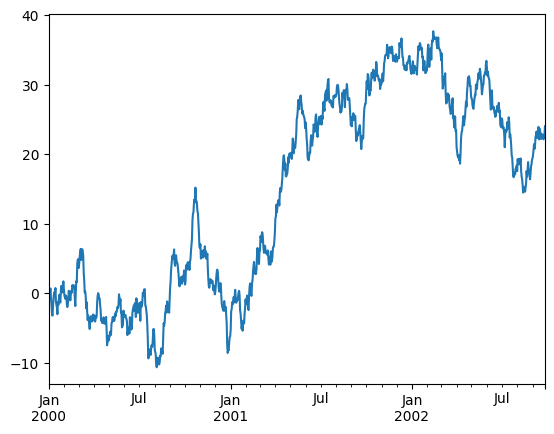

In [80]:
import matplotlib.pyplot as plt
ts = pd.Series(np.random.randn(1000), index=pd.date_range("1/1/2000", periods=1000))
ts = ts.cumsum()
ts.plot()


# Task 2.2:  

Adapt the code above to plot 4 timeseries in the same plot, with A different colour and label for each timeseries.\
The output should look similar to this:\

![ ](..\img\output_2_2.png)

<Axes: >

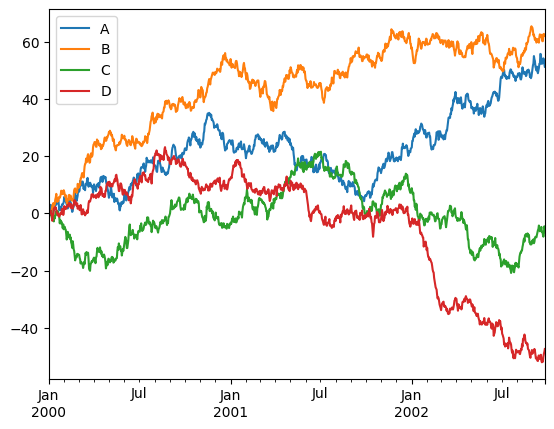

In [112]:
df = pd.DataFrame(
    np.random.randn(1000, 4), index=ts.index, columns=["A", "B", "C", "D"]
)


df = df.cumsum()
df.plot()
